In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_wo_dirt/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [3]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"dirt_covariance.root","RECREATE");


In [4]:
pot_data =     7.644e+18 
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

def draw_adding_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .91,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/15.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [5]:
f_mom = ROOT.TFile.Open(outputdir+"xsec_momentum_wighted.root", 'read')
h_xsec = f_mom.Get('h_xsec_data')
h_xsec.Scale(1e-38)

f_cv = ROOT.TFile.Open(input_filedir+"xsec_filesV4/xsec_momentum_wighted.root", 'read')
h_xsec_cv = f_cv.Get('h_xsec_data')
h_xsec_cv.Scale(1e-38)

num_bins = h_xsec_cv.GetNbinsX()

xsec_cov_matrix = np.zeros((num_bins,num_bins))
xsec_diff_matrix = np.zeros((num_bins))

for b in range(num_bins):
    xsec_diff_matrix[b]= (h_xsec.GetBinContent(b+1)-h_xsec_cv.GetBinContent(b+1) )/(h_xsec_cv.GetBinContent(b+1) + 1e-100)
#print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
np.save(output_filedir+'frac_covariance_detsys',xsec_cov_matrix)

In [6]:
RootFile = ROOT.TFile(output_filedir+"dirt_covariance.root","RECREATE");


610

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_frac_covariance_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_frac_covariance_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_frac_covariance_detsys.pdf has been created


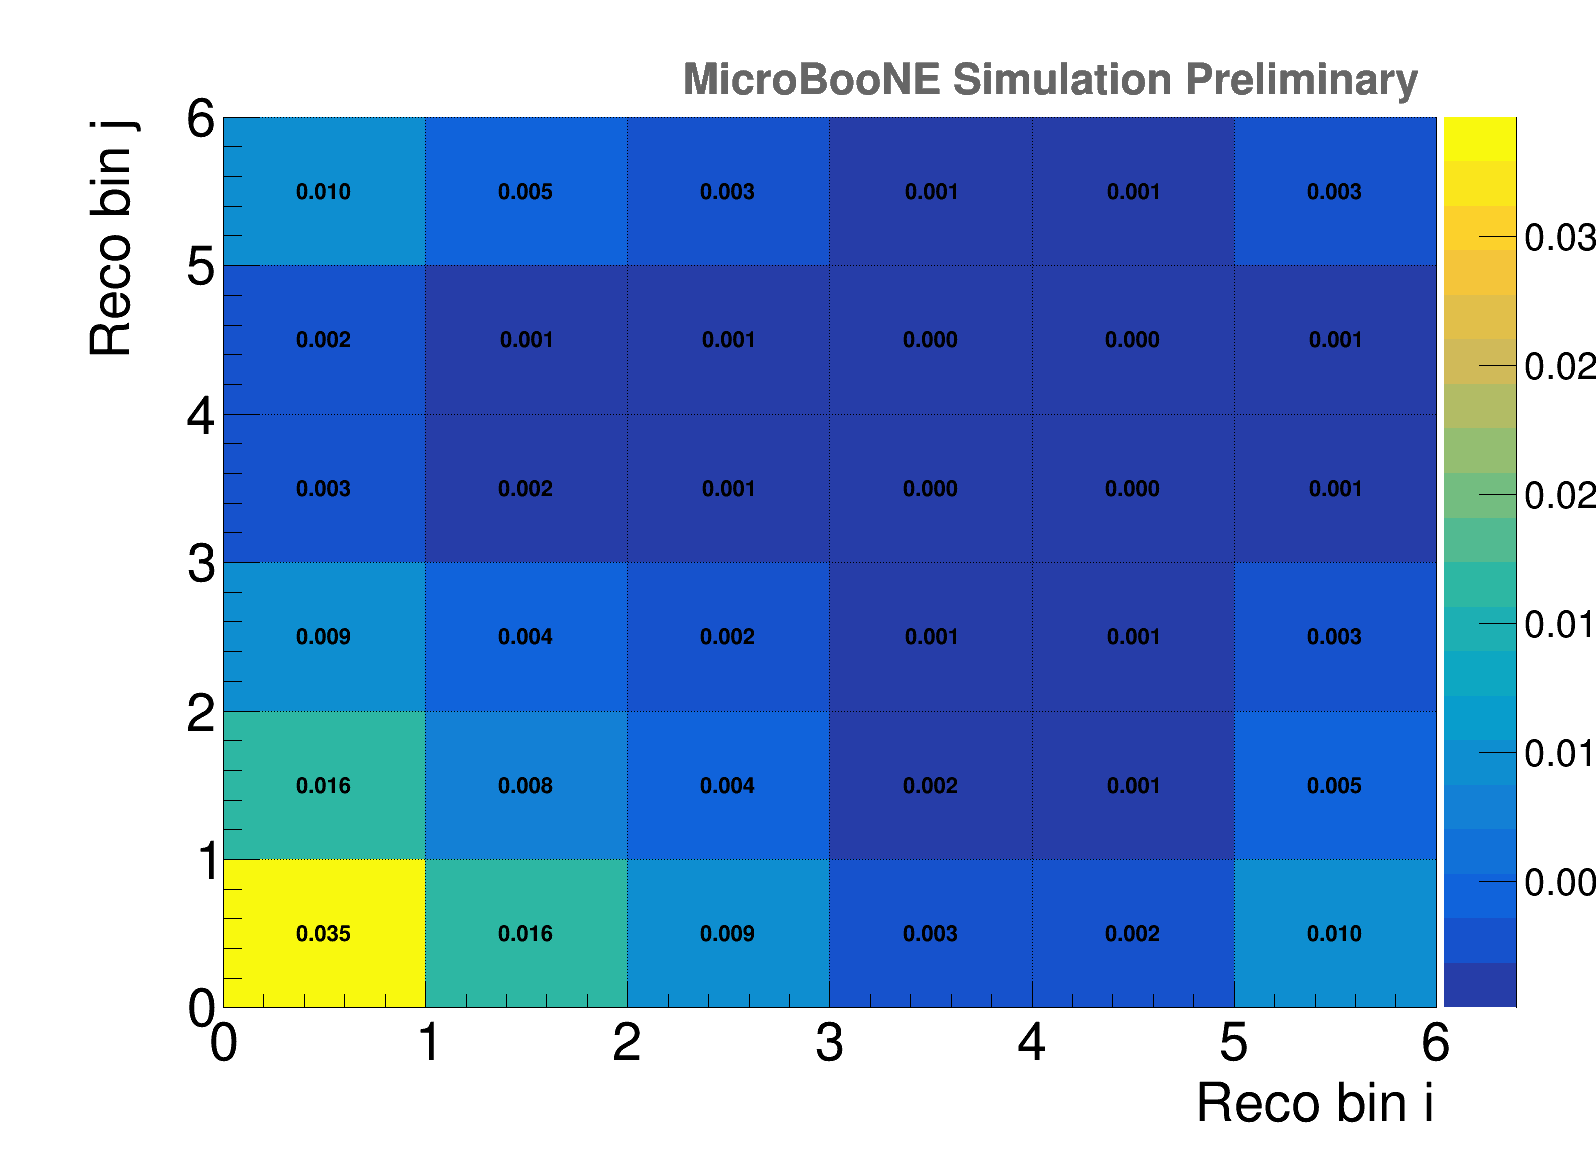

In [7]:
ROOT.gStyle.SetPaintTextFormat('0.6f')
h_covariance = ROOT.TH2F("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_covariance.Draw('colz')
c1.SetLogz(0)
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_detsys.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_detsys.root")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_detsys.pdf")
h_covariance.Write('h_frac_covariance')

In [8]:
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
xsec_diff_matrix = np.zeros((num_bins))
xsec_cov_matrix = np.zeros((num_bins,num_bins))
for b in range(num_bins):
    xsec_diff_matrix[b]= (h_xsec.GetBinContent(b+1)-h_xsec_cv.GetBinContent(b+1) )
xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix

xsec_corr_matrix = np.zeros((num_bins,num_bins))
for i in range(num_bins):
    for j in range(num_bins):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))

np.save(output_filedir+'correlation_detsys',xsec_corr_matrix)
np.save(output_filedir+'covariance_detsys',xsec_cov_matrix)

673

Warning in <TFile::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_covariance_dirtsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_covariance_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_covariance_detsys.pdf has been created


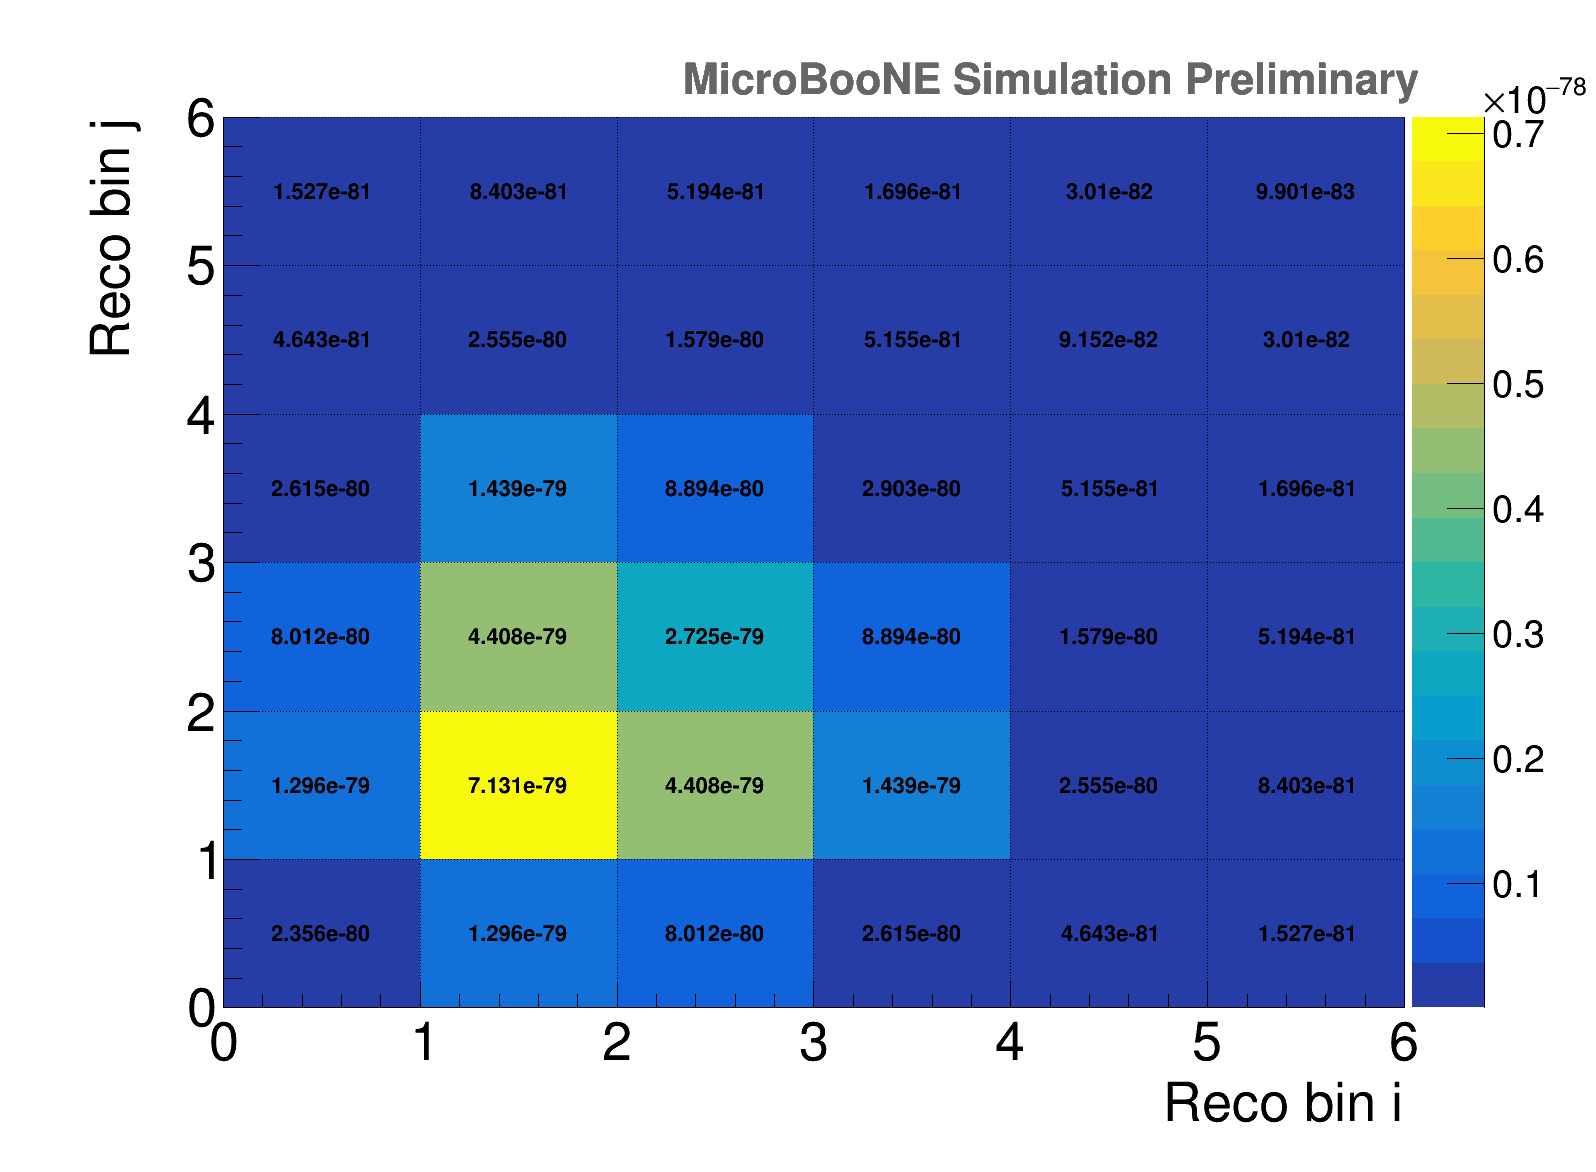

In [9]:
ROOT.gStyle.SetPaintTextFormat('0.6g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")

h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')

h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_dirtsys.png")
c1.SaveAs(outputdir_root + "h_covariance_detsys.root")
c1.SaveAs(outputdir_pdf + "h_covariance_detsys.pdf")
h_covariance.Write('h_covariance')

501

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_correlation_dirtsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_correlation_dirtsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_correlation_dirtsys.pdf has been created


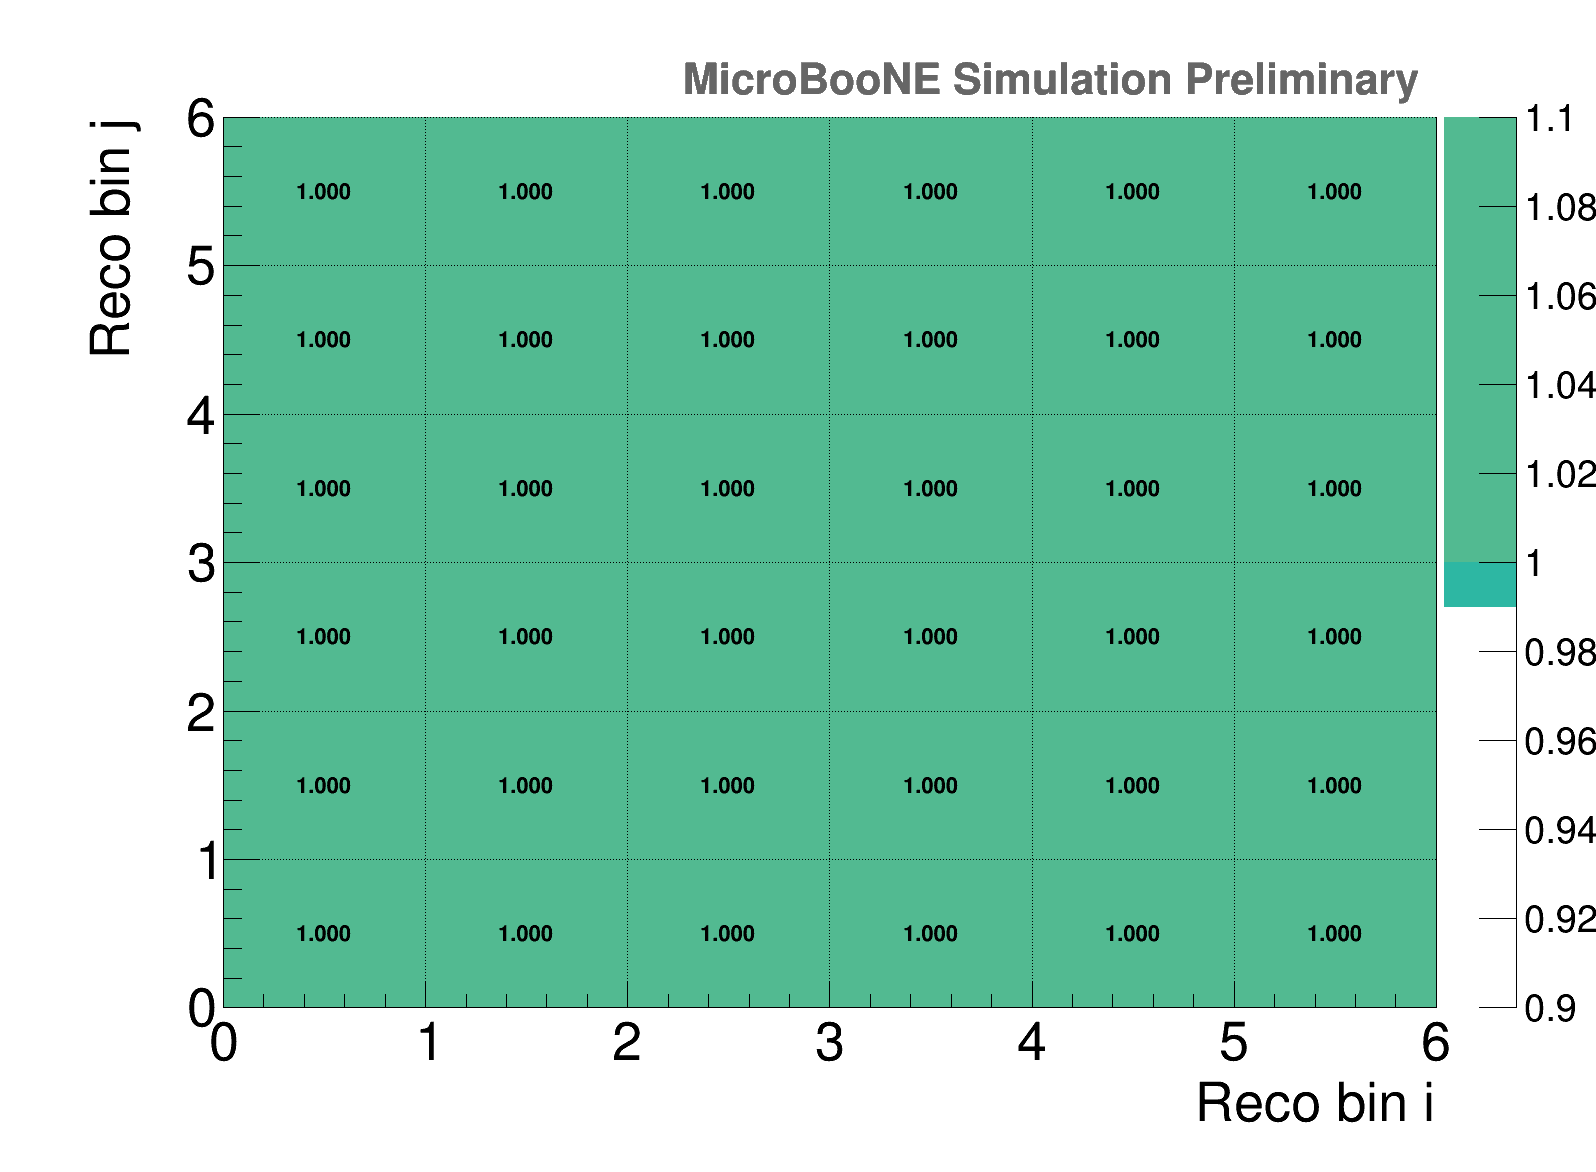

In [10]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")

h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

#h_correlation.SetMinimum(-1)
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_dirtsys.png")
c1.SaveAs(outputdir_root + "h_correlation_dirtsys.root")
c1.SaveAs(outputdir_pdf + "h_correlation_dirtsys.pdf")
h_correlation.Write('h_correlation')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_xsec_corr_dirt.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_xsec_corr_dirt.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_xsec_corr_dirt.pdf has been created


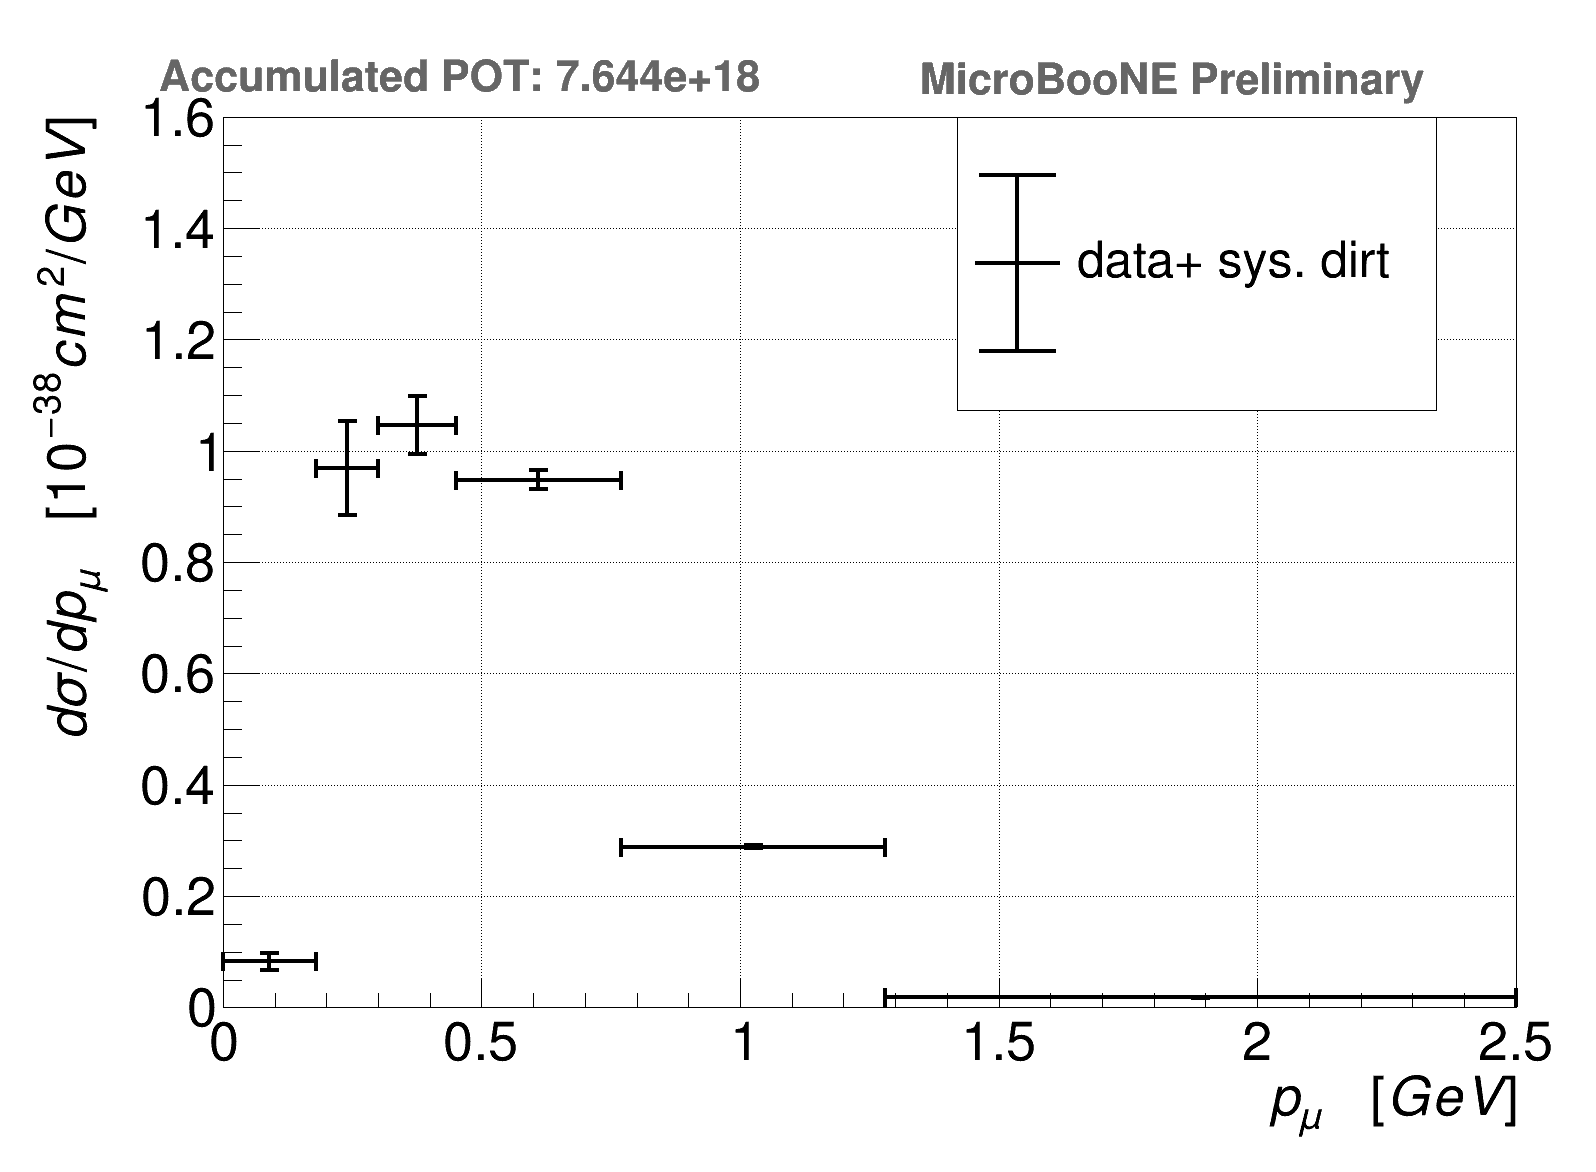

In [11]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_xsec_data = h_xsec_cv.Clone()
#h_xsec_MC.SetLineColor(2)
for i in range(num_bins):
    h_xsec_data.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i,i]))

h_xsec_data.Scale(1e38)
legend.AddEntry(h_xsec_data,'data+ sys. dirt',"lep");
#legend.AddEntry(h_xsec_MC,'MC',"f");
h_xsec_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_xsec_data.SetXTitle("p_{\mu} \t [GeV]")
h_xsec_data.SetLineWidth(3)
h_xsec_data.SetMaximum(1.6)
h_xsec_data.SetMinimum(0)

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_xsec_data.Draw('E1')
#h_xsec_MC.SetFillColor(0)
#h_xsec_MC.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
#h_xsec_MC.DrawCopy('Hist same')
#h_xsec_MC.SetFillColor(2)
#h_xsec_MC.SetFillStyle(3001)
#h_xsec_MC.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_dirt.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_dirt.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_dirt.pdf")

h_stat = h_xsec_data.Clone()

In [12]:
f_mom = ROOT.TFile.Open(outputdir+"xsec_theta_wighted.root", 'read')
h_xsec = f_mom.Get('h_xsec_data_theta')
h_xsec.Scale(1e-38)

f_cv = ROOT.TFile.Open(input_filedir+"xsec_filesV4/xsec_theta_wighted.root", 'read')
h_xsec_cv = f_cv.Get('h_xsec_data_theta')
h_xsec_cv.Scale(1e-38)

num_bins = h_xsec_cv.GetNbinsX()

xsec_cov_matrix = np.zeros((num_bins,num_bins))
xsec_diff_matrix = np.zeros((num_bins))

for b in range(num_bins):
    xsec_diff_matrix[b]= (h_xsec.GetBinContent(b+1)-h_xsec_cv.GetBinContent(b+1) )/(h_xsec_cv.GetBinContent(b+1) + 1e-100)
#print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
np.save(output_filedir+'frac_covariance_detsys',xsec_cov_matrix)

RootFile = ROOT.TFile(output_filedir+"dirt_covariance.root","UPDATE");

Warning in <TFile::Init>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/dirt_covariance.root probably not closed, cannot read free segments
Warning in <TFile::Init>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/dirt_covariance.root probably not closed, trying to recover
Info in <TFile::Recover>: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/dirt_covariance.root, recovered key TH2F:h_frac_covariance at address 396
Info in <TFile::Recover>: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/dirt_covariance.root, recovered key TH2D:h_covariance at address 1006
Info in <TFile::Recover>: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/dirt_covariance.root, recovered key TH2D:h_correlation at address 1679
Warning in <TFile::Init>: successfully recovered 3 keys


756

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_frac_covariance_theta_dirtsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_frac_covariance_theta_dirtsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_frac_covariance_theta_dirtsys.pdf has been created


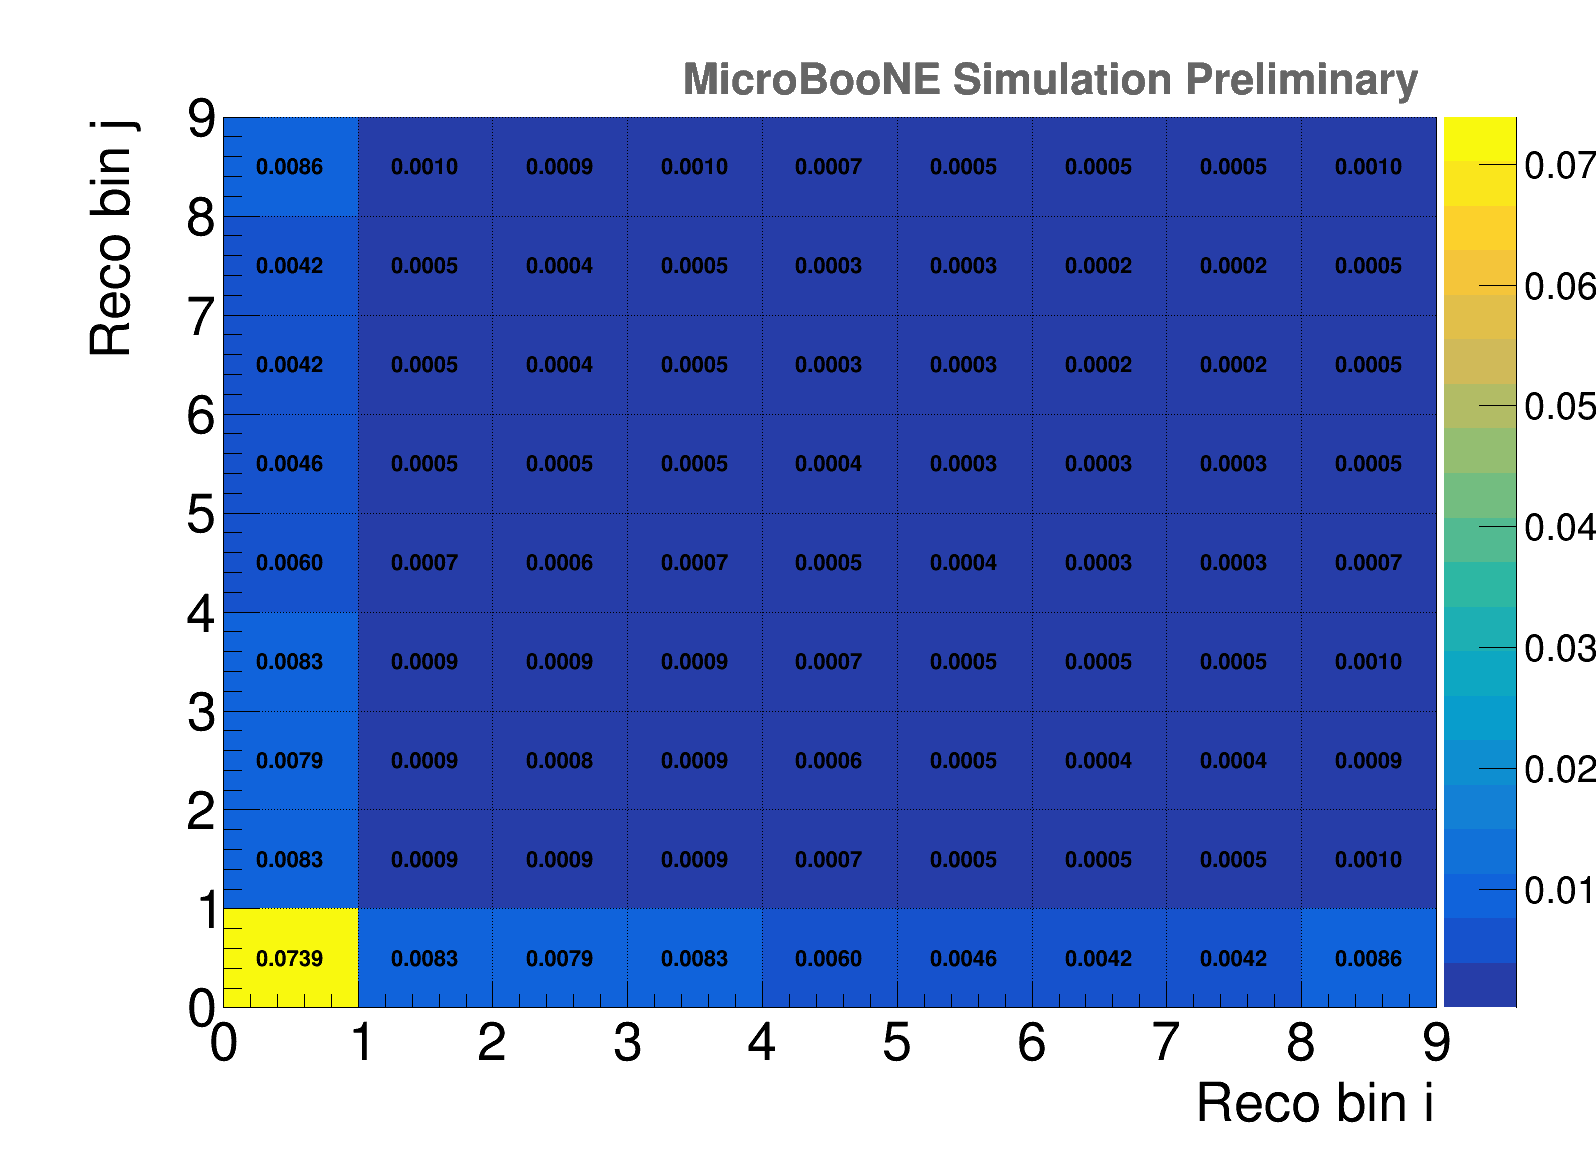

In [13]:
ROOT.gStyle.SetPaintTextFormat('0.6f')
h_covariance = ROOT.TH2F("h_covariance",'Covariance matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.4f')
h_covariance.Draw('colz')
c1.SetLogz(0)
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_theta_dirtsys.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_theta_dirtsys.root")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_theta_dirtsys.pdf")
h_covariance.Write('h_frac_covariance_theta')

In [14]:
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
xsec_diff_matrix = np.zeros((num_bins))
xsec_cov_matrix = np.zeros((num_bins,num_bins))
for b in range(num_bins):
    xsec_diff_matrix[b]= (h_xsec.GetBinContent(b+1)-h_xsec_cv.GetBinContent(b+1) )
xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix

xsec_corr_matrix = np.zeros((num_bins,num_bins))
for i in range(num_bins):
    for j in range(num_bins):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))

np.save(output_filedir+'correlation_dirtsys_theta',xsec_corr_matrix)
np.save(output_filedir+'correlation_dirtsys_theta',xsec_cov_matrix)

882

Warning in <TFile::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_covariance_dirtsys_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_covariance_dirtsys_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_covariance_dirtsys_theta.pdf has been created


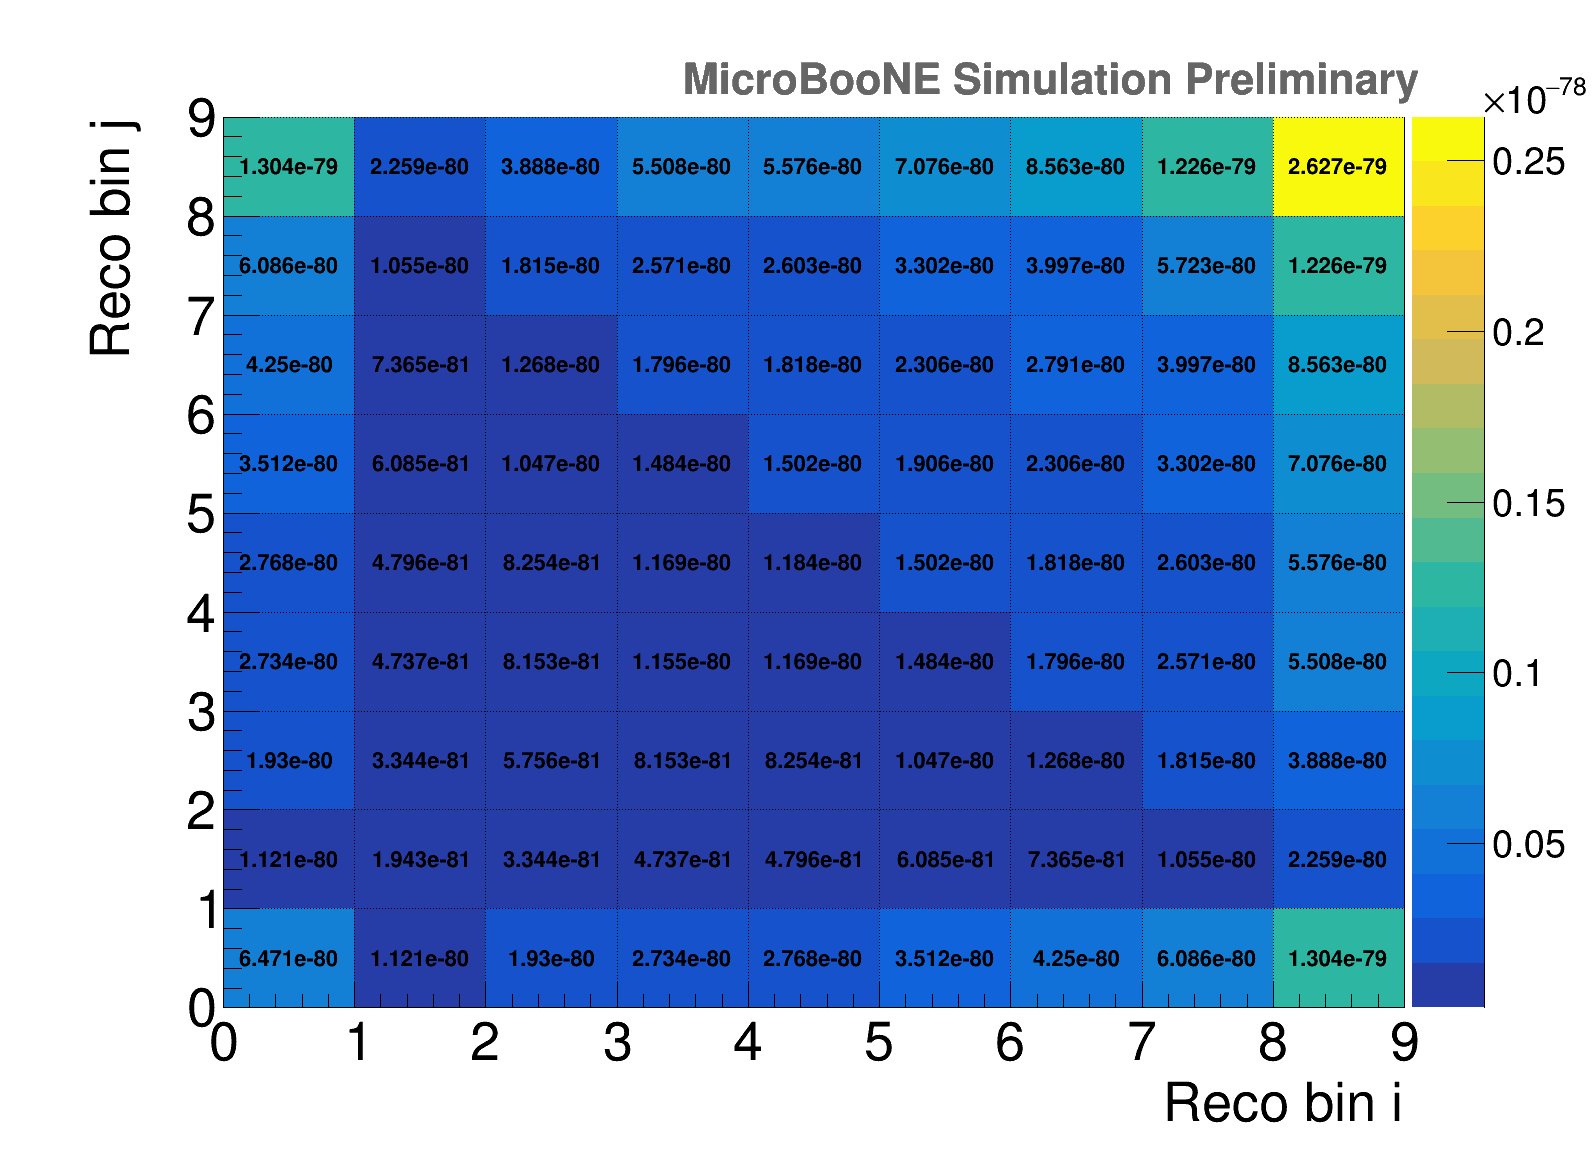

In [15]:
ROOT.gStyle.SetPaintTextFormat('0.6g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")

h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')

h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_dirtsys_theta.png")
c1.SaveAs(outputdir_root + "h_covariance_dirtsys_theta.root")
c1.SaveAs(outputdir_pdf + "h_covariance_dirtsys_theta.pdf")
h_covariance.Write('h_covariance_theta')

530

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_correlation_dirtsys_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_correlation_dirtsys_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_correlation_dirtsys_theta.pdf has been created


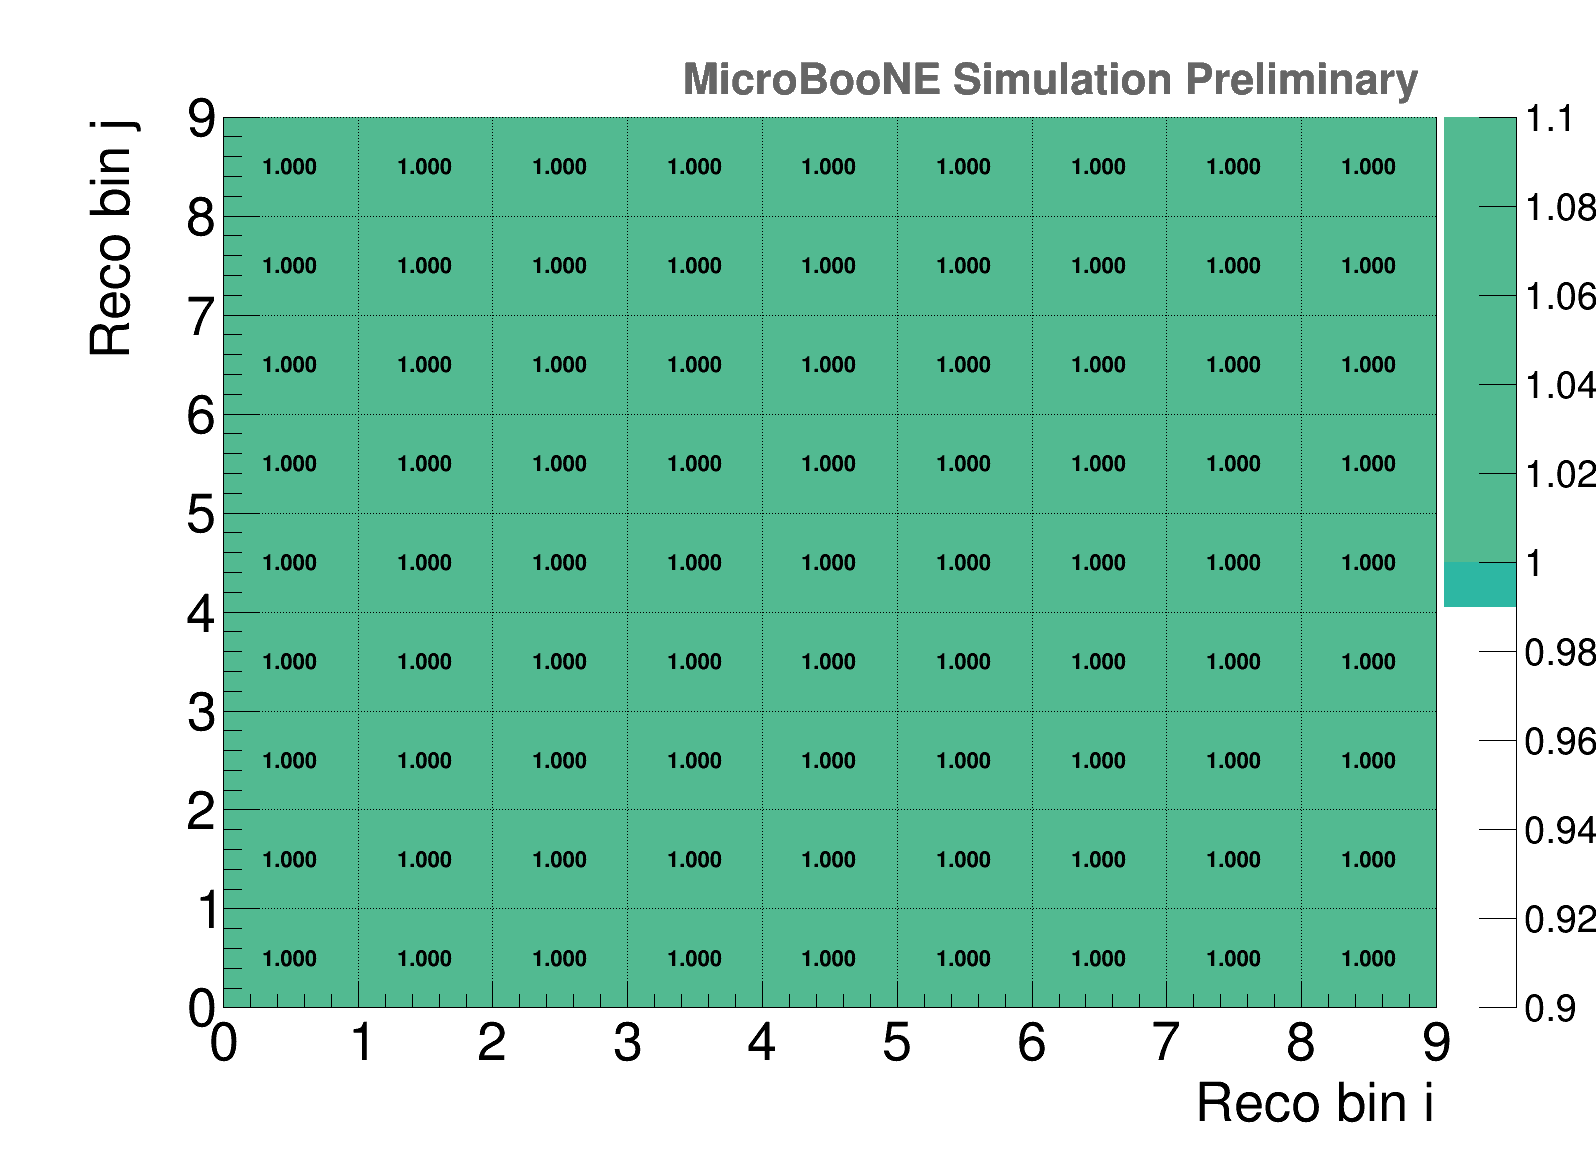

In [16]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")

h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

#h_correlation.SetMinimum(-1)
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_dirtsys_theta.png")
c1.SaveAs(outputdir_root + "h_correlation_dirtsys_theta.root")
c1.SaveAs(outputdir_pdf + "h_correlation_dirtsys_theta.pdf")
h_correlation.Write('h_correlation_theta')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_xsec_corr_theta_dirt.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_xsec_corr_theta_dirt.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_xsec_corr_theta_dirt.pdf has been created


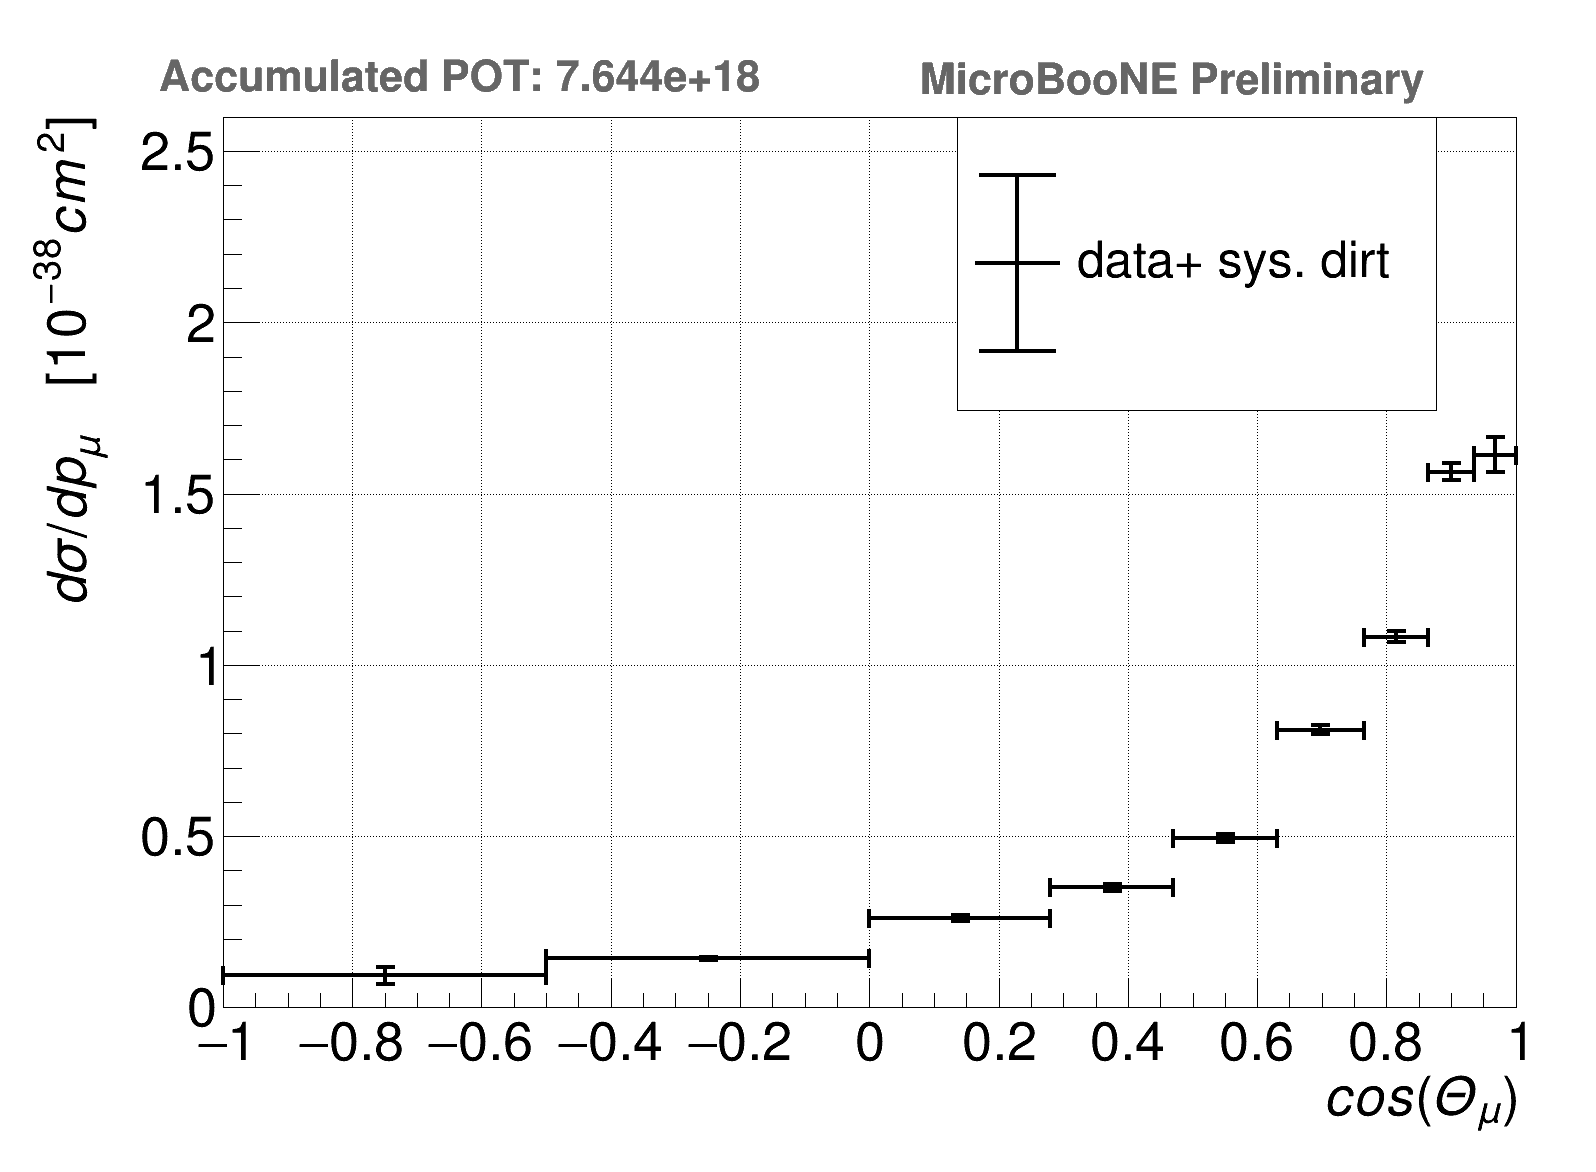

In [17]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_xsec_data = h_xsec_cv.Clone()
#h_xsec_MC.SetLineColor(2)
for i in range(num_bins):
    h_xsec_data.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i,i]))

h_xsec_data.Scale(1e38)
legend.AddEntry(h_xsec_data,'data+ sys. dirt',"lep");
#legend.AddEntry(h_xsec_MC,'MC',"f");
h_xsec_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}]")
h_xsec_data.SetXTitle("cos(\Theta_{\mu})")
h_xsec_data.SetLineWidth(3)
h_xsec_data.SetMaximum(2.6)
h_xsec_data.SetMinimum(0)

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_xsec_data.Draw('E1')
#h_xsec_MC.SetFillColor(0)
#h_xsec_MC.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
#h_xsec_MC.DrawCopy('Hist same')
#h_xsec_MC.SetFillColor(2)
#h_xsec_MC.SetFillStyle(3001)
#h_xsec_MC.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta_dirt.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta_dirt.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_theta_dirt.pdf")

h_stat = h_xsec_data.Clone()

In [18]:
RootFile.Close()